In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
path = 'C:/Users/shisk/Desktop/Projects/Data/teleCust1000t.csv'

In [4]:
df = pd.read_csv(path)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [6]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [7]:
# drop null values and reset index
df = df.dropna(axis = 'rows')
df.reset_index(drop = True, inplace = True)

In [8]:
#recheck presense of null entries
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [9]:
df.groupby('region').count()

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,,,,,,,,,,,
1,322,322,322,322,322,322,322,322,322,322,322
2,334,334,334,334,334,334,334,334,334,334,334
3,344,344,344,344,344,344,344,344,344,344,344


## Data Standardization

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
sc.fit(df.drop(labels = ['region'], axis = 1))

StandardScaler()

In [13]:
sc_features = sc.transform(df.drop('region', axis = 1)) 

In [14]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [15]:
df_feat = pd.DataFrame(sc_features, columns = ['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat'])
df_feat.head()

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,-1.055125,0.184505,1.010051,-0.253034,-0.126506,1.087753,-0.594123,-0.222076,-1.034598,-0.230650,-1.327980
1,-1.148806,-0.691812,1.010051,-0.451415,0.546450,1.906227,-0.594123,-0.222076,-1.034598,2.556662,1.351199
2,1.521092,0.821826,1.010051,1.234819,0.359517,-1.367671,1.787528,-0.222076,0.966559,-0.230650,0.458140
3,-0.118319,-0.691812,-0.990050,0.044536,-0.416251,-0.549196,-1.090300,-0.222076,0.966559,-0.927478,-1.327980
4,-0.586722,-0.930808,1.010051,-0.253034,-0.444291,-1.367671,-0.891829,-0.222076,-1.034598,1.163006,0.458140


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_feat
y = df['region']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [18]:
from sklearn.svm import SVC

svc = SVC()

In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
C = [float(x) for x in np.linspace(start = 0.02, stop = 100, num = 1000)]

grid = {
    'kernel': ['linear', 'poly','rbf','sigmoid'],
    'C': C,
    'gamma': ['auto']
}

In [21]:
svc_cv = RandomizedSearchCV(estimator = svc, param_distributions = grid, cv = 5, n_iter = 120, verbose = 1)

In [22]:
svc_cv.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  3.0min finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=120,
                   param_distributions={'C': [0.02, 0.12008008008008009,
                                              0.22016016016016016,
                                              0.3202402402402403,
                                              0.42032032032032035,
                                              0.5204004004004005,
                                              0.6204804804804805,
                                              0.7205605605605606,
                                              0.8206406406406407,
                                              0.9207207207207208,
                                              1.020800800800801,
                                              1.120880880880881,
                                              1.220960960960961,
                                              1.3210410410410411,
                                              1.4211211211211212,
                

In [23]:
params = svc_cv.best_params_

In [24]:
svc_final = SVC(**params)
svc_final.fit(X_train, y_train)

SVC(C=1.8214414414414415, gamma='auto', kernel='sigmoid')

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = svc_final.predict(X_test)

In [26]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[13 26 32]
 [11 32 19]
 [10 31 26]]
              precision    recall  f1-score   support

           1       0.38      0.18      0.25        71
           2       0.36      0.52      0.42        62
           3       0.34      0.39      0.36        67

    accuracy                           0.36       200
   macro avg       0.36      0.36      0.34       200
weighted avg       0.36      0.35      0.34       200



## Princial Component Analysis(PCA) for dimensionality reduction

In [28]:
from sklearn.decomposition import PCA
from tqdm import tqdm

In [29]:
def get_component_performance(feat):
    results = []
    for k in tqdm(range(2, 10)):
        pca = PCA(n_components = k)
        cmpts = pca.fit_transform(feat)
        variance = np.sum(pca.explained_variance_ratio_)
        results.append([k, variance])
    return results

In [30]:
res = get_component_performance(X_train)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 20.67it/s]


In [32]:
results_df = pd.DataFrame(res, columns = ['Components', 'Explained Variance'])

In [33]:
results_df

,Components,Explained Variance
0,2,0.440839
1,3,0.565638
2,4,0.657606
3,5,0.747156
4,6,0.814616
5,7,0.877281
6,8,0.918952
7,9,0.952619


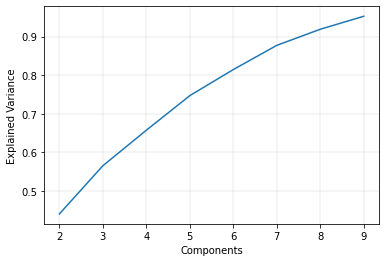

In [36]:
ax = sns.lineplot(data = results_df, x = 'Components', y = 'Explained Variance')
ax.grid(b=True, which='major', color='black', linewidth=0.075)
ax.grid(b=True, which='minor', color='black', linewidth=0.075)

In [38]:
pca = PCA(n_components = 7)
train_cmpts = pca.fit_transform(X_train)

In [39]:
test_cmpts = pca.transform(X_test)

In [40]:
svc_cv.fit(train_cmpts, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  4.4min finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=120,
                   param_distributions={'C': [0.02, 0.12008008008008009,
                                              0.22016016016016016,
                                              0.3202402402402403,
                                              0.42032032032032035,
                                              0.5204004004004005,
                                              0.6204804804804805,
                                              0.7205605605605606,
                                              0.8206406406406407,
                                              0.9207207207207208,
                                              1.020800800800801,
                                              1.120880880880881,
                                              1.220960960960961,
                                              1.3210410410410411,
                                              1.4211211211211212,
                

In [41]:
params = svc_cv.best_params_

In [42]:
svc_final = SVC(**params)
svc_final.fit(train_cmpts, y_train)

SVC(C=59.167327327327335, gamma='auto', kernel='sigmoid')

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = svc_final.predict(test_cmpts)

In [44]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[19 19 33]
 [13 29 20]
 [25 19 23]]
              precision    recall  f1-score   support

           1       0.33      0.27      0.30        71
           2       0.43      0.47      0.45        62
           3       0.30      0.34      0.32        67

    accuracy                           0.36       200
   macro avg       0.36      0.36      0.36       200
weighted avg       0.35      0.35      0.35       200

